### Load Functions

In [ ]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import BandTradeBacktester
from simple_trade import BacktestPlotter
from simple_trade import premade_backtest

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Backtest with Bollinger Bands

Computing BOLLIN...


,Adj Close,Close,High,Low,Open,Volume,BB_Middle_20,BB_Upper_20_2,BB_Lower_20_2
Date,,,,,,,,,
2024-01-02,138.735336,139.559998,140.615005,137.740005,139.600006,20071900,NaN,NaN,NaN
2024-01-03,139.530609,140.360001,141.089996,138.429993,138.600006,18974300,NaN,NaN,NaN
2024-01-04,137.224319,138.039993,140.634995,138.009995,139.850006,18253300,NaN,NaN,NaN
2024-01-05,136.578171,137.389999,138.809998,136.850006,138.352005,15433200,NaN,NaN,NaN
2024-01-08,139.699615,140.529999,140.639999,137.880005,138.000000,17645300,NaN,NaN,NaN


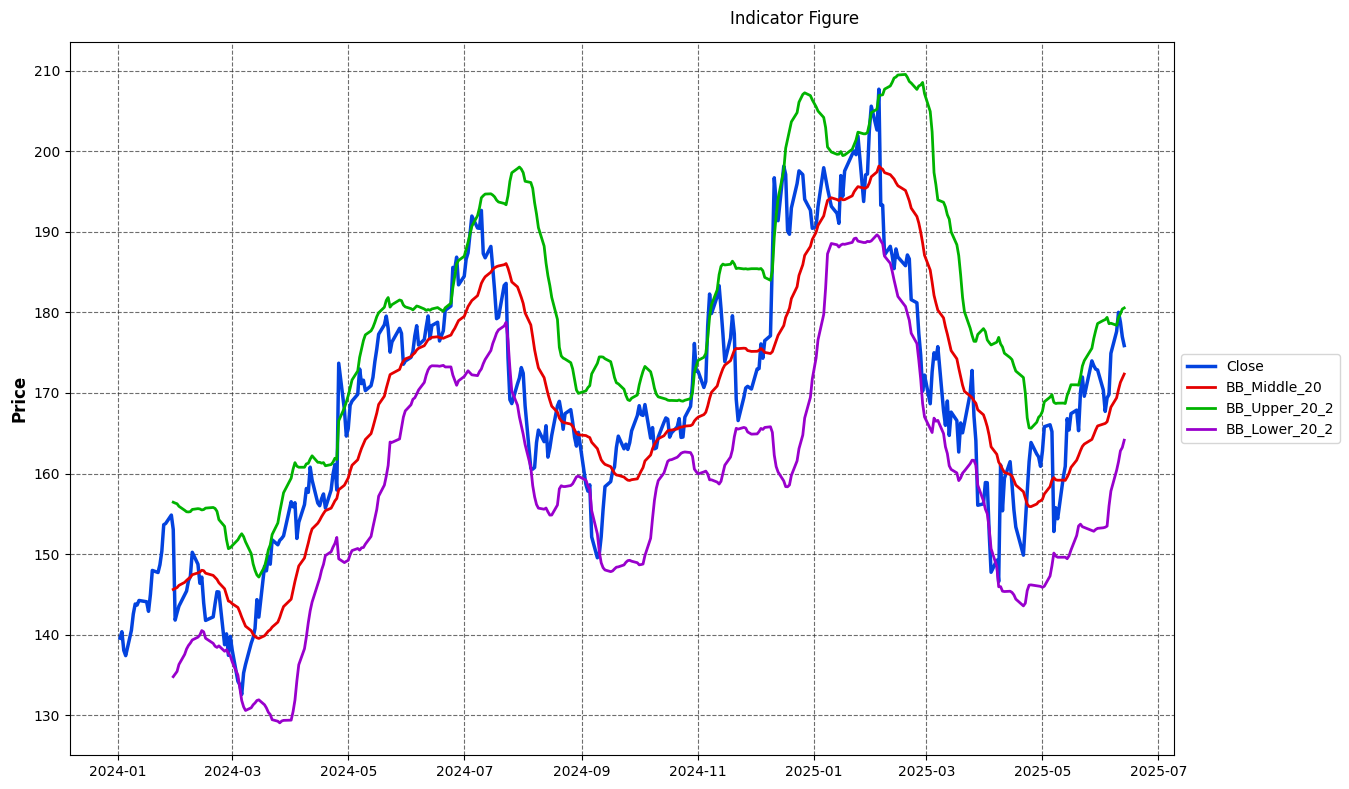

In [2]:
# Step 1: Download data
symbol = 'GOOG'
start = '2024-01-01'
interval = '1d'
initial_cash = 10000.0
commission = 0.001
data = download_data(symbol, start, interval=interval)

# Step 2: Calculate Bollinger Bands (using default window=20, std_dev=2)
parameters = dict()
columns = dict()
parameters["window"] = 20
parameters["num_std"] = 2
columns["close_col"] = 'Close'
data, columns, fig = compute_indicator(
    data=data,
    indicator='bollin',
    parameters=parameters,
    columns=columns

)
data.head(5)

In [3]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col='Close',
    upper_band_col='BB_Upper_20_2',
    lower_band_col='BB_Middle_20',
    price_col='Close',
    trading_type='long',
    long_entry_pct_cash=1,
    strategy_type=2,
)

# --- Results ---
backtester.print_results(results)


✨ Band Trade (Close vs BB_Middle_20/BB_Upper_20_2 - Breakout) ✨

🗓️ BACKTEST PERIOD:
  • Period: 2024-01-30 to 2025-06-13
  • Duration: 500 days
  • Trading Days: 345

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $9,752.69
  • Total Return: -2.47%
  • Annualized Return: -1.81%
  • Number of Trades: 11
  • Total Commissions: $19,040.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 14.80%
  • Benchmark Final Value: $11,480.19
  • Strategy vs Benchmark: -17.27%

📉 RISK METRICS:
  • Sharpe Ratio: -0.030
  • Sortino Ratio: -0.090
  • Maximum Drawdown: -19.87%
  • Average Drawdown: -10.49%
  • Max Drawdown Duration: 337 days
  • Avg Drawdown Duration: 38.55 days
  • Annualized Volatility: 16.82%



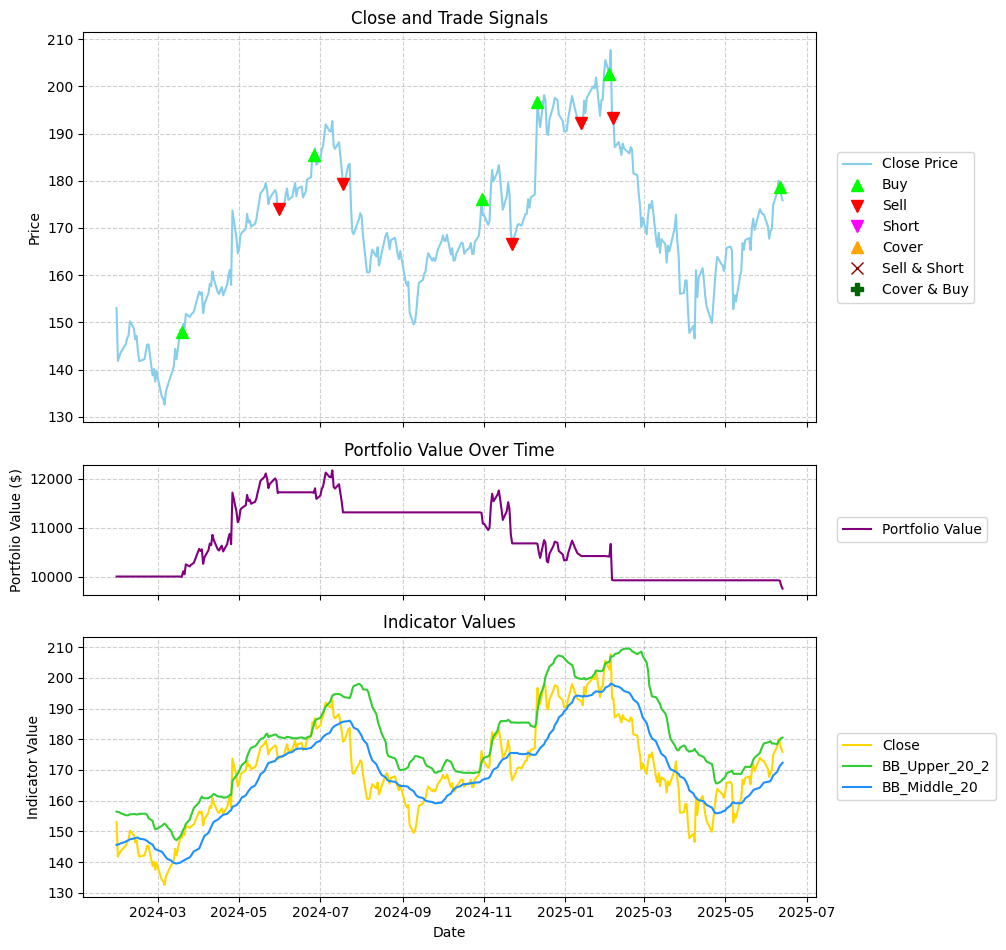

In [4]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = ['Close', 'BB_Upper_20_2', 'BB_Middle_20']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Bollinger Bands (Long Only) (BB-20 BB_Upper_20_2/BB_Middle_20)"
)

### Backtest with Keltner Channels


Computing KELT...


,Adj Close,Close,High,Low,Open,Volume,KELT_Middle_20_10_2.0,KELT_Upper_20_10_2.0,KELT_Lower_20_10_2.0
Date,,,,,,,,,
2024-01-02,138.735336,139.559998,140.615005,137.740005,139.600006,20071900,139.559998,NaN,NaN
2024-01-03,139.530594,140.360001,141.089996,138.429993,138.600006,18974300,139.636188,NaN,NaN
2024-01-04,137.224304,138.039993,140.634995,138.009995,139.850006,18253300,139.484170,NaN,NaN
2024-01-05,136.578156,137.389999,138.809998,136.850006,138.352005,15433200,139.284725,NaN,NaN
2024-01-08,139.699615,140.529999,140.639999,137.880005,138.000000,17645300,139.403322,NaN,NaN


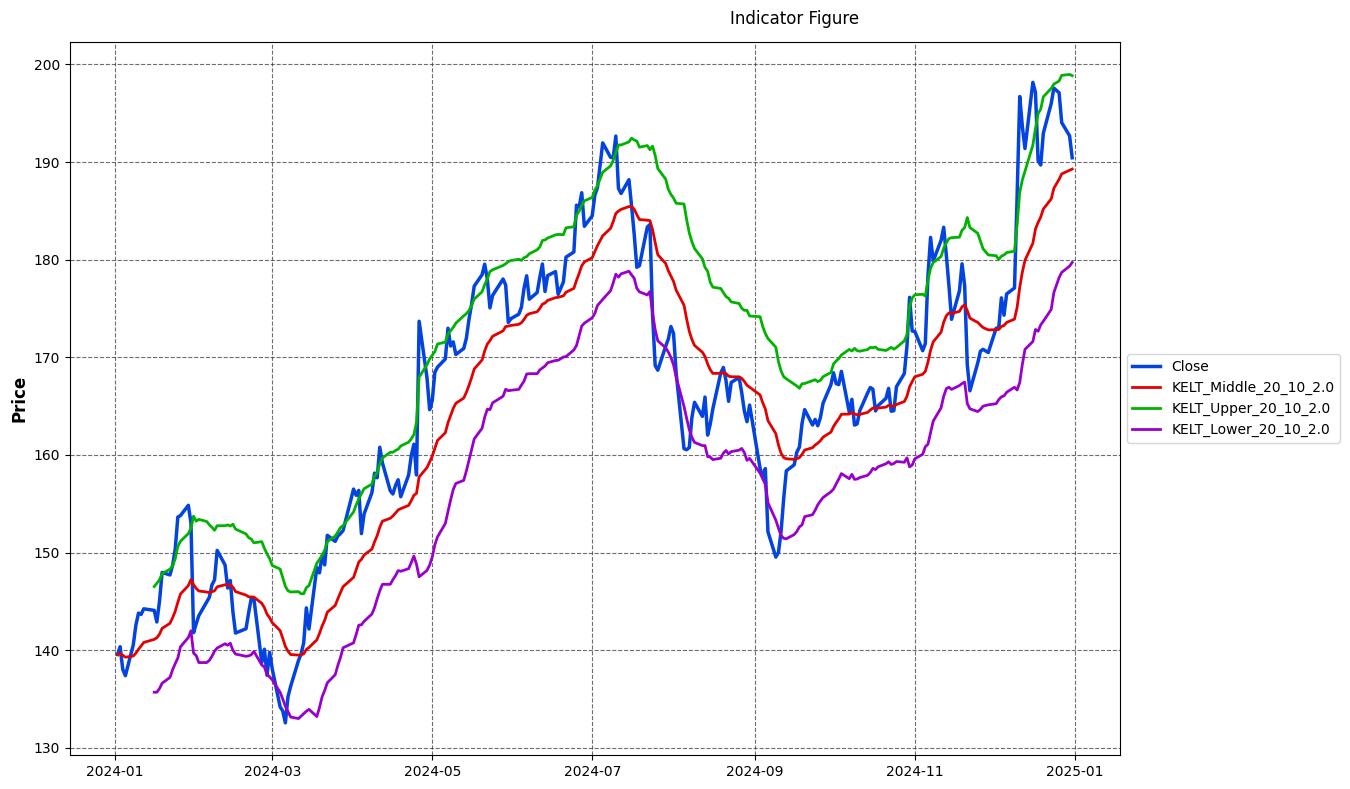

In [5]:
# Step 1: Download data
symbol = 'GOOG'
start = '2024-01-01'
end = '2025-01-01'
initial_cash = 10000.0
commission = 0.001
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
parameters = dict()
columns = dict()
parameters["ema_window"] = 20
parameters["atr_window"] = 10
parameters["atr_multiplier"] = 2.0
columns["high_col"] = 'High'
columns["low_col"] = 'Low'
columns["close_col"] = 'Close'
data, columns, fig = compute_indicator(
    data=data,
    indicator='kelt',
    parameters=parameters,
    columns=columns
)
data.head(5)

In [6]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col='Close',
    upper_band_col='KELT_Upper_20_10_2.0',
    lower_band_col='KELT_Middle_20_10_2.0',
    price_col='Close',
    trading_type='long',
    long_entry_pct_cash=1,
    strategy_type=2,
)

# --- Results ---
backtester.print_results(results)


✨ Band Trade (Close vs KELT_Middle_20_10_2.0/KELT_Upper_20_10_2.0 - Breakout) ✨

🗓️ BACKTEST PERIOD:
  • Period: 2024-01-16 to 2024-12-31
  • Duration: 350 days
  • Trading Days: 243

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,256.04
  • Total Return: 12.56%
  • Annualized Return: 13.05%
  • Number of Trades: 7
  • Total Commissions: $8,719.31

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 32.04%
  • Benchmark Final Value: $13,204.45
  • Strategy vs Benchmark: -19.48%

📉 RISK METRICS:
  • Sharpe Ratio: 0.730
  • Sortino Ratio: 0.670
  • Maximum Drawdown: -8.48%
  • Average Drawdown: -5.59%
  • Max Drawdown Duration: 173 days
  • Avg Drawdown Duration: 34.89 days
  • Annualized Volatility: 19.40%



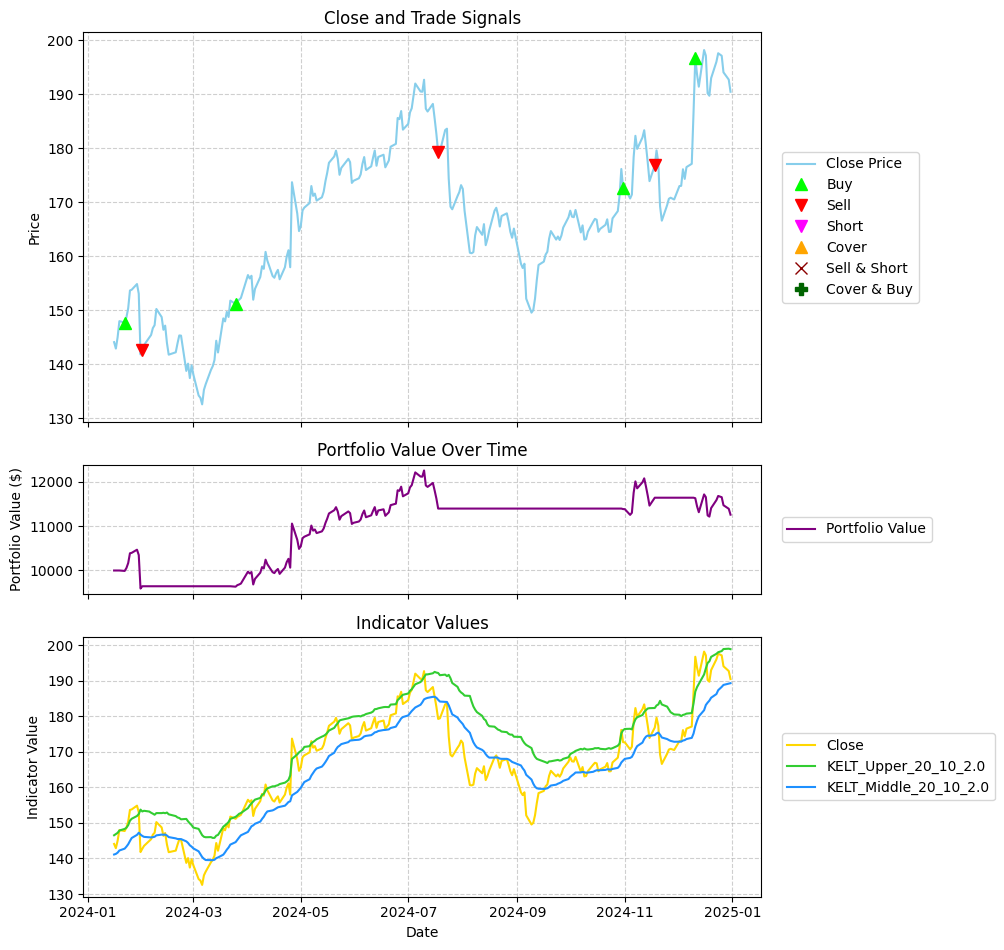

In [7]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = ['Close', 'KELT_Upper_20_10_2.0', 'KELT_Middle_20_10_2.0']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Keltner Channels (Long Only) (KELT_Upper_20_10_2.0/KELT_Middle_20_10_2.0)"
)

### Premade Backtest

Computing BOLLIN...


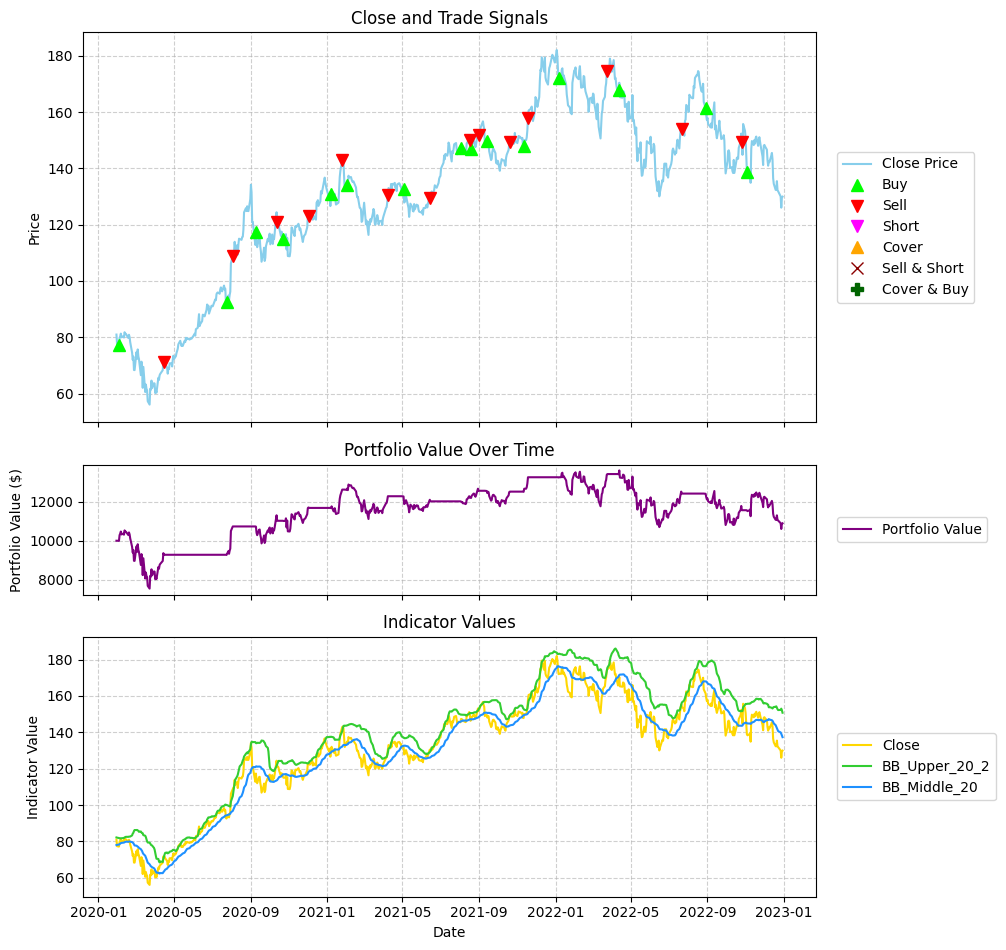

In [ ]:
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
parameters = dict()
columns = dict()
parameters["window"] = 20
parameters["num_std"] = 2

results, portfolio, fig = premade_backtest(data, 
                                           strategy_name="bollin", 
                                           parameters=parameters)